In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [34]:
data=pd.read_excel("F:\SEM8\DV\BSE-IT-CSVForDate.xlsm")

data1=pd.read_excel("F:\SEM8\DV\BSE-O&G-CSVForDate.xlsx")

In [35]:
data.head()

,Date,Open,High,Low,Close
0,2013-02-01,NaN,NaN,NaN,6367.29
1,2013-02-04,NaN,NaN,NaN,6352.02
2,2013-02-05,NaN,NaN,NaN,6342.09
3,2013-02-06,NaN,NaN,NaN,6381.64
4,2013-02-07,NaN,NaN,NaN,6421.85


In [36]:
data1.head()

,Date,Open,High,Low,Close
0,2013-02-01,9378.29,9451.90,9310.86,9374.93
1,2013-02-04,9407.14,9433.65,9251.70,9269.70
2,2013-02-05,9241.85,9281.95,9192.43,9209.68
3,2013-02-06,9247.99,9286.82,9176.73,9192.98
4,2013-02-07,9160.69,9235.91,9096.04,9120.99


In [37]:
data['Date']=pd.to_datetime(data['Date'])
data1['Date']=pd.to_datetime(data1['Date'])

In [38]:
data.head()

,Date,Open,High,Low,Close
0,2013-02-01,NaN,NaN,NaN,6367.29
1,2013-02-04,NaN,NaN,NaN,6352.02
2,2013-02-05,NaN,NaN,NaN,6342.09
3,2013-02-06,NaN,NaN,NaN,6381.64
4,2013-02-07,NaN,NaN,NaN,6421.85


In [39]:
data1.head()

,Date,Open,High,Low,Close
0,2013-02-01,9378.29,9451.90,9310.86,9374.93
1,2013-02-04,9407.14,9433.65,9251.70,9269.70
2,2013-02-05,9241.85,9281.95,9192.43,9209.68
3,2013-02-06,9247.99,9286.82,9176.73,9192.98
4,2013-02-07,9160.69,9235.91,9096.04,9120.99


In [40]:
data['High'].replace('', np.nan, inplace=True)
data['Low'].replace('', np.nan, inplace=True)
data['Open'].replace('', np.nan, inplace=True)
data1['High'].replace('', np.nan, inplace=True)
data1['Low'].replace('', np.nan, inplace=True)
data1['Open'].replace('', np.nan, inplace=True)

In [41]:
data.head()

,Date,Open,High,Low,Close
0,2013-02-01,NaN,NaN,NaN,6367.29
1,2013-02-04,NaN,NaN,NaN,6352.02
2,2013-02-05,NaN,NaN,NaN,6342.09
3,2013-02-06,NaN,NaN,NaN,6381.64
4,2013-02-07,NaN,NaN,NaN,6421.85


In [42]:
#Droping the rows that contains missing values
data.dropna(subset=['High','Low','Open','Close'], inplace=True)
data1.dropna(subset=['High','Low','Open','Close'], inplace=True)

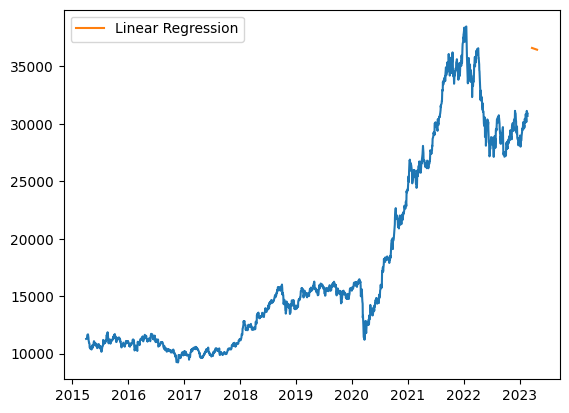

In [43]:

X = data[['High','Open','Low']].values.reshape(-1, 1)
y = data['Close'].values
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

lr = LinearRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


future_dates = pd.date_range(start='2023-03-22', end='2023-04-24')
future_X = np.arange(len(X) + 1, len(X) + len(future_dates) + 1).reshape(-1, 1)
lr_preds = lr.predict(future_X)
dt_preds = dt.predict(future_X)
rf_preds = rf.predict(future_X)


plt.plot(data['Date'], data['Close'])
plt.plot(future_dates, lr_preds, label='Linear Regression')
plt.legend()
plt.show()

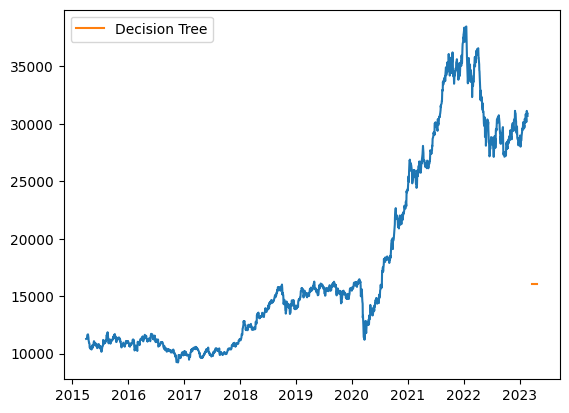

In [44]:
plt.plot(data['Date'], data['Close'])
plt.plot(future_dates, dt_preds, label='Decision Tree')
plt.legend()
plt.show()

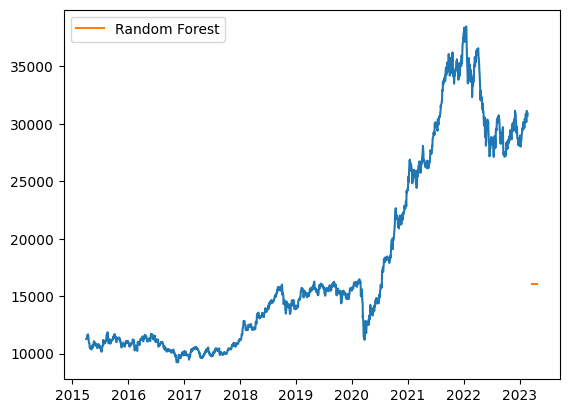

In [45]:
plt.plot(data['Date'], data['Close'])
plt.plot(future_dates, rf_preds, label='Random Forest')
plt.legend()
plt.show()

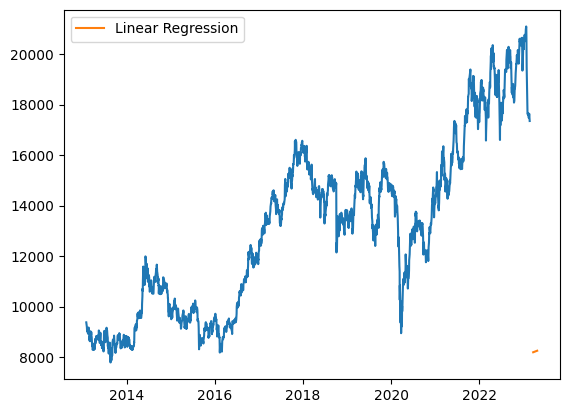

In [46]:

X = data1[['High','Open','Low']].values.reshape(-1, 1)
y = data1['Close'].values
train_size = int(0.8 * len(data1))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

lr = LinearRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


future_dates = pd.date_range(start='2023-03-22', end='2023-04-24')
future_X = np.arange(len(X) + 1, len(X) + len(future_dates) + 1).reshape(-1, 1)
lr_preds = lr.predict(future_X)
dt_preds = dt.predict(future_X)
rf_preds = rf.predict(future_X)


plt.plot(data1['Date'], data1['Close'])
plt.plot(future_dates, lr_preds, label='Linear Regression')
plt.legend()
plt.show()

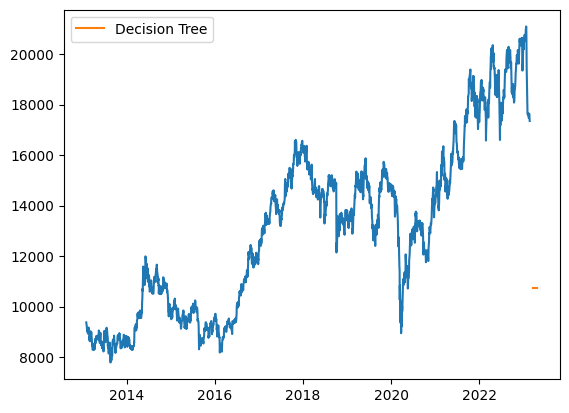

In [47]:
plt.plot(data1['Date'], data1['Close'])
plt.plot(future_dates, dt_preds, label='Decision Tree')
plt.legend()
plt.show()

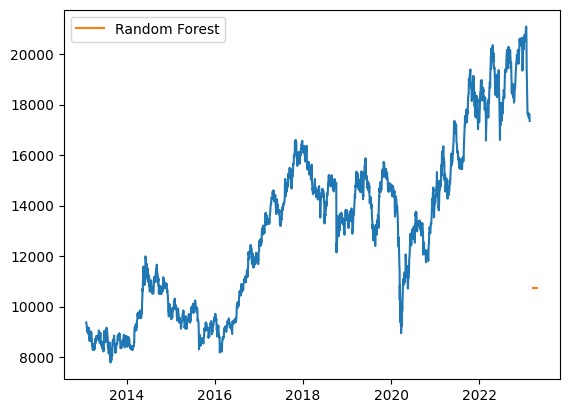

In [48]:
plt.plot(data1['Date'], data1['Close'])
plt.plot(future_dates, rf_preds, label='Random Forest')
plt.legend()
plt.show()